### dataset

#### load the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/CompanyValues.csv')

#### basic EDA of the data

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

  ticker_symbol    day_date  close_value    volume  open_value  high_value  \
0          AAPL  2020-05-29       317.94  38399530      319.25      321.15   
1          AAPL  2020-05-28       318.25  33449100      316.77      323.44   
2          AAPL  2020-05-27       318.11  28236270      316.14      318.71   
3          AAPL  2020-05-26       316.73  31380450      323.50      324.24   
4          AAPL  2020-05-22       318.89  20450750      315.77      319.23   

   low_value  
0     316.47  
1     315.63  
2     313.09  
3     316.50  
4     315.35  


In [ ]:
# Get information about the DataFrame, including data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB
None


In [ ]:
# Generate descriptive statistics of the numerical columns
print(df.describe())

        close_value        volume    open_value    high_value     low_value
count  17528.000000  1.752800e+04  17528.000000  17528.000000  17528.000000
mean     455.167040  2.025441e+07    455.314451    459.710597    450.466694
std      469.324583  3.322733e+07    469.588291    473.771691    464.794791
min       15.800000  7.932000e+03     16.140000     16.630000     14.980000
25%      100.300000  2.075086e+06     99.883750    100.927500     98.940000
50%      256.500000  4.835618e+06    256.095000    259.604500    252.177400
75%      735.630000  2.704358e+07    735.740000    742.000000    728.920025
max     2497.940000  4.624423e+08   2500.000000   2525.450000   2467.270000


In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

ticker_symbol    0
day_date         0
close_value      0
volume           0
open_value       0
high_value       0
low_value        0
dtype: int64


In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(df[numerical_cols].corr())

             close_value    volume  open_value  high_value  low_value
close_value     1.000000 -0.406546    0.999801    0.999890   0.999900
volume         -0.406546  1.000000   -0.406370   -0.406183  -0.406767
open_value      0.999801 -0.406370    1.000000    0.999906   0.999878
high_value      0.999890 -0.406183    0.999906    1.000000   0.999823
low_value       0.999900 -0.406767    0.999878    0.999823   1.000000


ticker_symbol
AAPL     3085
AMZN     3085
GOOGL    3085
MSFT     3085
TSLA     3065
GOOG     2123
Name: count, dtype: int64


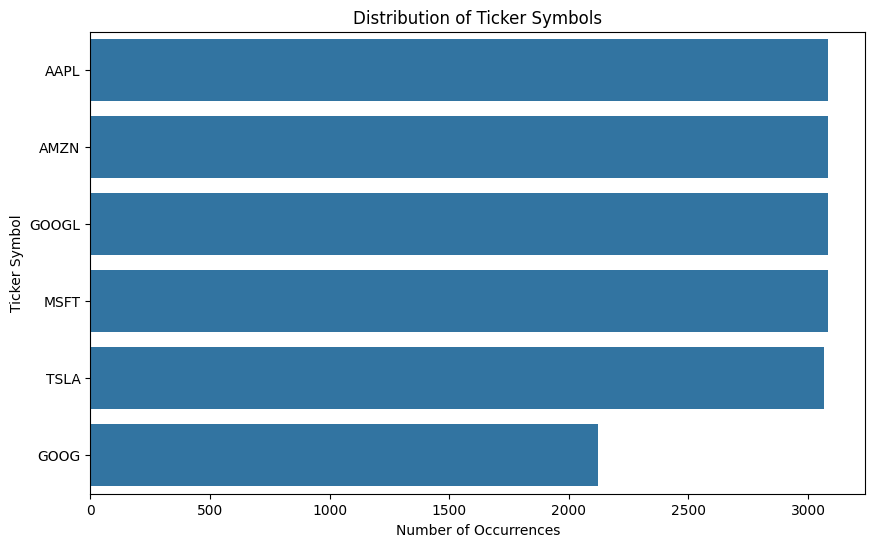

Number of unique ticker symbols: 6


In [ ]:
# prompt: hãy thực hiện EDA với cột ticker_symbol: là cột tên các công ty

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in the previous code

# Explore the 'ticker_symbol' column
print(df['ticker_symbol'].value_counts())  # Count occurrences of each ticker symbol

# Visualize the distribution of ticker symbols
plt.figure(figsize=(10, 6))
sns.countplot(y='ticker_symbol', data=df, order=df['ticker_symbol'].value_counts().index)
plt.title('Distribution of Ticker Symbols')
plt.xlabel('Number of Occurrences')
plt.ylabel('Ticker Symbol')
plt.show()


# Further analysis (optional):
# Check for unique ticker symbols
unique_tickers = df['ticker_symbol'].unique()
print(f"Number of unique ticker symbols: {len(unique_tickers)}")


count                            17528
mean     2015-12-28 02:07:05.559105280
min                2010-06-01 00:00:00
25%                2013-11-26 00:00:00
50%                2016-04-13 00:00:00
75%                2018-04-13 00:00:00
max                2020-05-29 00:00:00
Name: day_date, dtype: object


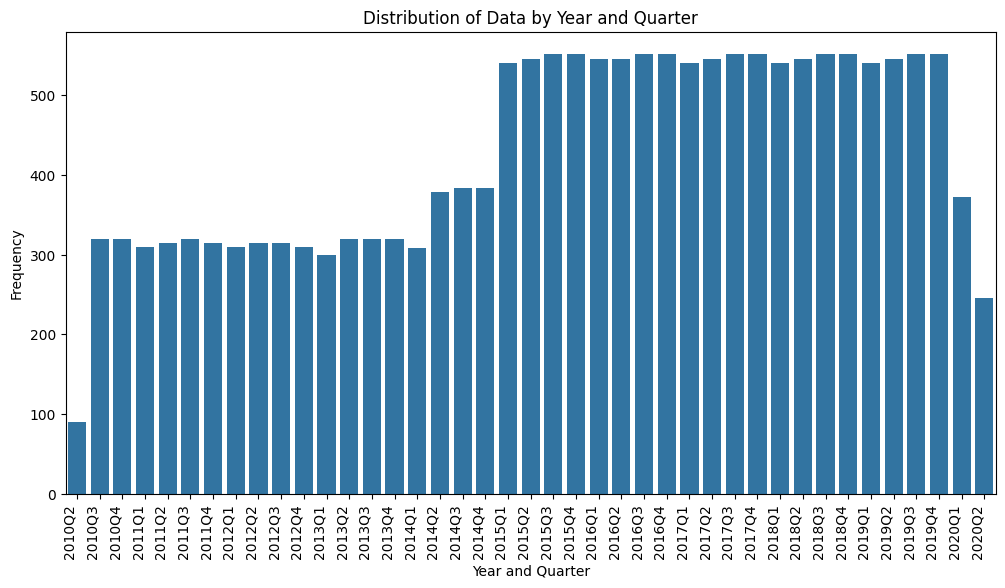

In [ ]:
# prompt: perform EDA on the 'day_date' column

import pandas as pd
import matplotlib.pyplot as plt
# Convert 'day_date' to datetime objects if it's not already
df['day_date'] = pd.to_datetime(df['day_date'])

# Extract year, month, and day
df['year'] = df['day_date'].dt.year
df['month'] = df['day_date'].dt.month
df['day'] = df['day_date'].dt.day
df['quarter'] = df['day_date'].dt.quarter
df['year_quarter'] = df['day_date'].dt.to_period('Q')

# Analyze the distribution of dates
print(df['day_date'].describe())

plt.figure(figsize=(12, 6))
sns.countplot(x='year_quarter', data=df, order=sorted(df['year_quarter'].unique()))
plt.title('Distribution of Data by Year and Quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.show()

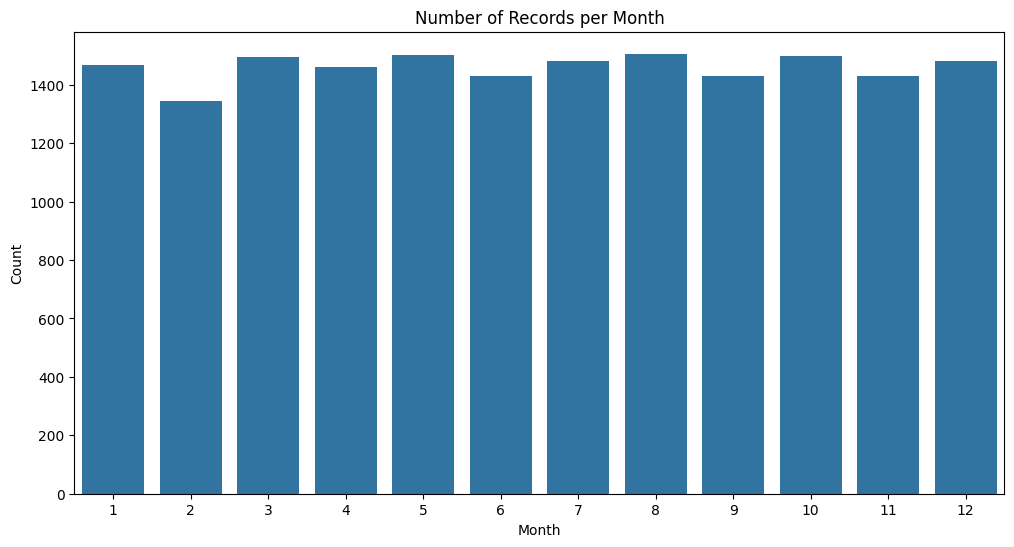

In [ ]:
# phân phối dữ liệu theo tháng
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df)
plt.title('Number of Records per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [ ]:
#Check for missing dates or any irregularities
print(df['day_date'].isnull().sum()) # check for null values
print(df['day_date'].unique()) # look for any strange entries

0
<DatetimeArray>
['2020-05-29 00:00:00', '2020-05-28 00:00:00', '2020-05-27 00:00:00',
 '2020-05-26 00:00:00', '2020-05-22 00:00:00', '2020-05-21 00:00:00',
 '2020-05-20 00:00:00', '2020-05-19 00:00:00', '2020-05-18 00:00:00',
 '2020-05-15 00:00:00',
 ...
 '2019-12-01 00:00:00', '2019-12-07 00:00:00', '2019-12-08 00:00:00',
 '2019-12-14 00:00:00', '2019-12-15 00:00:00', '2019-12-21 00:00:00',
 '2019-12-22 00:00:00', '2019-12-25 00:00:00', '2019-12-28 00:00:00',
 '2019-12-29 00:00:00']
Length: 3085, dtype: datetime64[ns]


### data engineering

#### pre-process

- dữ liệu được chia theo nhiều công ty (mỗi công ty lại có một thời gian khác nhau) $\rightarrow$ chia thành từng df riêng để tính các chỉ số tài chính

In [ ]:
# prompt: người đẹp chia df thành các df bé dựa trên tên công ty (cột ticker_symbol), anh Muốn tạo thành nhiều df riêng

# Assuming df is already loaded as in the previous code

# Group the DataFrame by 'ticker_symbol'
grouped = df.groupby('ticker_symbol')

# Create a dictionary to store individual DataFrames
company_dfs = {}

# Iterate through each group and create a separate DataFrame
for ticker, group_df in grouped:
    company_dfs[ticker] = group_df

# Now you have a dictionary where keys are ticker symbols and values are the corresponding DataFrames
# Example: Access the DataFrame for company 'AAPL'
# aapl_df = company_dfs['AAPL']

# You can then perform further analysis or calculations on each individual DataFrame.
# For example, print the first few rows of each DataFrame
for ticker, company_df in company_dfs.items():
    print(f"DataFrame for {ticker}:")
    print(company_df.head())
    print("-" * 20) # Separator between company dataframes


DataFrame for AAPL:
  ticker_symbol   day_date  close_value    volume  open_value  high_value  \
0          AAPL 2020-05-29       317.94  38399530      319.25      321.15   
1          AAPL 2020-05-28       318.25  33449100      316.77      323.44   
2          AAPL 2020-05-27       318.11  28236270      316.14      318.71   
3          AAPL 2020-05-26       316.73  31380450      323.50      324.24   
4          AAPL 2020-05-22       318.89  20450750      315.77      319.23   

   low_value  year  month  day  quarter year_quarter  
0     316.47  2020      5   29        2       2020Q2  
1     315.63  2020      5   28        2       2020Q2  
2     313.09  2020      5   27        2       2020Q2  
3     316.50  2020      5   26        2       2020Q2  
4     315.35  2020      5   22        2       2020Q2  
--------------------
DataFrame for AMZN:
     ticker_symbol   day_date  close_value   volume  open_value  high_value  \
3085          AMZN 2020-05-29      2442.37  3529329     2415.94   2

In [ ]:
aapl_df = company_dfs['AAPL']
amzn_df = company_dfs['AMZN']
gg_df = company_dfs['GOOGL']
msft_df = company_dfs['MSFT']
tsla_df = company_dfs['TSLA']

#### calculate financial indicators

##### SMA: trung bình cộng giá đóng của `N` ngày gần nhất  

- công thức $\begin{equation}
SMA(t, N) = \sum_{k=1}^{N} \frac{CP(t-k)}{N}
\end{equation}$
- có 2 biến là `closing_price` và `context_window` (trong paper không đề cập `N=` bao nhiêu cụ thể, em chọn 30)
- thời gian được xếp từ theo thứ tự giảm dần → sắp xếp lại theo tăng dần để tiện tính sma
- 30 ngày đầu ko có đủ dữ liệu để tính SMA thì em để giá trị của SMA = 0
- SMA giúp làm mịn dữ liệu giá → nhận biết xu hướng chung
- SMA tăng dần thì giá có xu hướng tăng & ngược lại

In [ ]:
import pandas as pd

def sort_dataframe_by_date(df, ascending=True):
    """
    Sorts a DataFrame by the 'day_date' column in ascending or descending order.

    Args:
        df: The input DataFrame with a 'day_date' column.
        ascending (bool): True để sắp xếp tăng dần, False để giảm dần.

    Returns:
        A new DataFrame sorted by 'day_date'.
    """
    if 'day_date' not in df.columns:
        raise ValueError("DataFrame must contain a 'day_date' column.")

    # Chuyển 'day_date' thành datetime nếu chưa đúng kiểu
    df = df.copy()  # Tránh sửa đổi DataFrame gốc
    df['day_date'] = pd.to_datetime(df['day_date'], errors='coerce')

    # Kiểm tra xem có giá trị NaT (không thể convert) hay không
    if df['day_date'].isna().any():
        raise ValueError("Có giá trị không hợp lệ trong cột 'day_date'.")

    # Sắp xếp theo ngày tháng
    return df.sort_values(by='day_date', ascending=ascending)


In [ ]:
# Apply the function to each DataFrame
aapl_df = sort_dataframe_by_date(aapl_df)
amzn_df = sort_dataframe_by_date(amzn_df)
gg_df = sort_dataframe_by_date(gg_df)
msft_df = sort_dataframe_by_date(msft_df)
tsla_df = sort_dataframe_by_date(tsla_df)

In [ ]:
import pandas as pd

def calculate_sma(df, n=30):
    """
    Calculates the Simple Moving Average (SMA) for a given DataFrame.
    Fills the first (n-1) rows with 0 instead of NaN.

    Args:
        df: DataFrame with a 'close_value' column.
        n: The window size for the SMA calculation.

    Returns:
        DataFrame with an additional 'sma' column.
    """
    if 'close_value' not in df.columns:
        raise ValueError("DataFrame must contain a 'close_value' column.")

    df = df.copy()  # Tránh sửa đổi DataFrame gốc
    df['sma'] = df['close_value'].rolling(window=n).mean()

    # Điền 0 vào những vị trí chưa đủ dữ liệu
    df['sma'].fillna(0, inplace=True)

    return df

In [ ]:
aapl_df = calculate_sma(aapl_df, n=30)
amzn_df = calculate_sma(amzn_df, n=30)
gg_df = calculate_sma(gg_df, n=30)
msft_df = calculate_sma(msft_df, n=30)
tsla_df = calculate_sma(tsla_df, n=30)

<ipython-input-71-65a7769f4b9a>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sma'].fillna(0, inplace=True)


##### EMA: SMA với trọng số cao hơn cho những ngày gần
- công thức
\begin{equation}
EMA(t, \Delta) = (CP(t) - EMA(t-1)) \times \Gamma + EMA(t-1)
\end{equation}

\begin{equation}
\Gamma = \frac{2}{\Delta + 1}, \quad \Delta = \text{Time period EMA}
\end{equation}

- có 3 biến
  - `close_price` tại ngày `t`
  - giá trị EMA ngày trước đó
  - `delta`: window size cho ngày tính EMA (=30)
- em lấy giá trị SMA của ngày thứ 30 để làm giá trị EMA khởi tạo cho ngày 'đầu tiên' để tính EMA cho các ngày sau đó
- EMA nhạy hơn với biến động giá gần đây (do đánh trọng số) → thường được dùng để phát hiện xu hướng ngắn hạn

In [ ]:
# prompt: tạo một cột mới cho df có tên mà ema, với giá trị tất cả các ô đầu là 0,  trừ giá trị của ô thứ 31 là giá trị sma ở bên cột sma

# Assuming aapl_df is already processed as in the previous code

# Create the 'ema' column filled with 0.0 to ensure it's float type
aapl_df['ema'] = 0.0  # Initialize with 0.0 instead of 0

# Set the 31st value (index 30) to the corresponding SMA value
if len(aapl_df) >= 31:  # Check if the DataFrame has at least 31 rows
    # Use .iloc to access by position instead of label
    aapl_df.iloc[30, aapl_df.columns.get_loc('ema')] = aapl_df.iloc[30, aapl_df.columns.get_loc('sma')]

# Repeat the same process for other dataframes (amzn_df, gg_df, etc.)
amzn_df['ema'] = 0.0
if len(amzn_df) >= 31:
    amzn_df.iloc[30, amzn_df.columns.get_loc('ema')] = amzn_df.iloc[30, amzn_df.columns.get_loc('sma')]

gg_df['ema'] = 0.0
if len(gg_df) >= 31:
    gg_df.iloc[30, gg_df.columns.get_loc('ema')] = gg_df.iloc[30, gg_df.columns.get_loc('sma')]

msft_df['ema'] = 0.0
if len(msft_df) >= 31:
    msft_df.iloc[30, msft_df.columns.get_loc('ema')] = msft_df.iloc[30, msft_df.columns.get_loc('sma')]

tsla_df['ema'] = 0.0
if len(tsla_df) >= 31:
    tsla_df.iloc[30, tsla_df.columns.get_loc('ema')] = tsla_df.iloc[30, tsla_df.columns.get_loc('sma')]

In [ ]:
import pandas as pd
import numpy as np

def calculate_ema(df, delta=30):
    """
    Calculates the Exponential Moving Average (EMA) for a given DataFrame.

    Args:
        df: DataFrame with 'close_value' and 'ema' columns. Assumes ema at index delta is initialized as SMA.
        delta: The time period for the EMA calculation (default=30).

    Returns:
        DataFrame with an updated 'ema' column.
    """
    df = df.copy()

    # Kiểm tra nếu DataFrame đủ dữ liệu
    if len(df) < delta + 1:  # Cần ít nhất delta + 1 dòng để tính từ dòng delta
        raise ValueError(f"DataFrame must have at least {delta + 1} rows to calculate EMA.")

    # Kiểm tra nếu EMA tại delta (dòng 30) đã được khởi tạo
    if pd.isna(df.loc[df.index[delta], 'ema']):
        raise ValueError(f"EMA at index {delta} must be initialized (e.g., with SMA).")

    # Tính gamma
    gamma = 2 / (delta + 1)

    # Tính EMA từ dòng delta + 1 (tức i = 31) trở đi
    for i in range(delta + 1, len(df)):
        df.loc[df.index[i], 'ema'] = (df.loc[df.index[i], 'close_value'] - df.loc[df.index[i-1], 'ema']) * gamma + df.loc[df.index[i-1], 'ema']

    return df

# Áp dụng hàm cho từng DataFrame
aapl_df = calculate_ema(aapl_df)
amzn_df = calculate_ema(amzn_df)
gg_df = calculate_ema(gg_df)
msft_df = calculate_ema(msft_df)
tsla_df = calculate_ema(tsla_df)

##### MACD: so sánh EMA ngắn hạn và dài hạn → xu hướng

- công thức

\begin{equation}
MACD = EMA(t, k) - EMA(t, d)
\end{equation}


- 3 biến
  - `EMA(t, k)` là thời kỳ ngắn hạn (`k = 12`)
  - `EMA(t, d)` là thời kỳ dài hạn (`d = 26`)
  - giá `close_price` để tính EMA
  - MACD > 0 cho thấy EMA ngắn hạn > EMA dài hạn → xu hướng tăng nhanh hơn trong thời gian ngắn hạn so với dài hạn & ngược lại
  - MACD = 0 → thị trường ít biến động

In [ ]:
import pandas as pd
import numpy as np

def calculate_ema12_ema26(df, delta_12=12, delta_26=26):
    """
    Calculates EMA12 and EMA26 starting from index 30, using SMA(30) as initial value.

    Args:
        df: DataFrame with 'close_value' and 'ema' columns (ema at index 30 is SMA(30)).
        delta_12: Window size for EMA12 (default=12).
        delta_26: Window size for EMA26 (default=26).

    Returns:
        DataFrame with 'ema12' and 'ema26' columns.
    """
    df = df.copy()

    # Kiểm tra nếu DataFrame đủ dữ liệu
    if len(df) < 31:  # Cần ít nhất 31 dòng để bắt đầu từ dòng 30
        raise ValueError("DataFrame must have at least 31 rows.")

    # Kiểm tra nếu ema tại dòng 30 đã được khởi tạo
    if pd.isna(df.loc[df.index[30], 'ema']):
        raise ValueError("EMA at index 30 must be initialized (e.g., with SMA(30)).")

    # Khởi tạo cột ema12 và ema26 với NaN
    df['ema12'] = np.nan
    df['ema26'] = np.nan

    # Sử dụng giá trị ema tại dòng 30 (SMA(30)) làm khởi tạo cho ema12 và ema26
    initial_value = df.loc[df.index[30], 'ema']
    df.loc[df.index[30], 'ema12'] = initial_value
    df.loc[df.index[30], 'ema26'] = initial_value

    # Tính gamma
    gamma_12 = 2 / (delta_12 + 1)
    gamma_26 = 2 / (delta_26 + 1)

    # Tính EMA12 và EMA26 từ dòng 31 trở đi
    for i in range(31, len(df)):
        df.loc[df.index[i], 'ema12'] = (df.loc[df.index[i], 'close_value'] - df.loc[df.index[i-1], 'ema12']) * gamma_12 + df.loc[df.index[i-1], 'ema12']
        df.loc[df.index[i], 'ema26'] = (df.loc[df.index[i], 'close_value'] - df.loc[df.index[i-1], 'ema26']) * gamma_26 + df.loc[df.index[i-1], 'ema26']

    return df

# Áp dụng cho từng DataFrame
aapl_df = calculate_ema12_ema26(aapl_df)
amzn_df = calculate_ema12_ema26(amzn_df)
gg_df = calculate_ema12_ema26(gg_df)
msft_df = calculate_ema12_ema26(msft_df)
tsla_df = calculate_ema12_ema26(tsla_df)

In [ ]:
def calculate_macd(df):
    """
    Calculates MACD from ema12 and ema26 columns.

    Args:
        df: DataFrame with 'ema12' and 'ema26' columns.

    Returns:
        DataFrame with 'macd' column.
    """
    df = df.copy()

    # Kiểm tra nếu cột ema12 và ema26 tồn tại
    if 'ema12' not in df.columns or 'ema26' not in df.columns:
        raise ValueError("DataFrame must contain 'ema12' and 'ema26' columns.")

    # Tính MACD
    df['macd'] = df['ema12'] - df['ema26']

    return df

# Áp dụng cho từng DataFrame
aapl_df = calculate_macd(aapl_df)
amzn_df = calculate_macd(amzn_df)
gg_df = calculate_macd(gg_df)
msft_df = calculate_macd(msft_df)
tsla_df = calculate_macd(tsla_df)

##### OBV: đo xu hướng giá dựa trên sự thay đổi giá đóng cửa so với ngày trước và khối lượng

- công thức

\begin{equation}
OBV = OBV_{pr} +
\begin{cases}
\text{volume}, & \text{if } CP > CP_{pr} \\
0, & \text{if } CP = CP_{pr} \\
-\text{volume}, & \text{if } CP < CP_{pr}
\end{cases}
\end{equation}

- 4 biến
  - giá đóng tại ngày `t`
  - giá đóng ngày trước đó
  - `volume`: khối lượng giao dịch tại ngày `t` (thể hiện mức độ hoạt động giao dịch của một cổ phiếu)
    - cao thường đi kèm với biến động giá lớn → thị trường đang quan tâm & ngược lại
  - giá trị OBV của ngày trước đó (khởi tạo = 0)
- nếu OBV tăng dần qua ngày → lực mua đang mạnh (dù giá có thể dao động)

In [ ]:
import pandas as pd
import numpy as np

def calculate_obv(df):
    """
    Calculates the On-Balance Volume (OBV) for a given DataFrame.

    Args:
        df: DataFrame with 'close_value' and 'volume' columns.

    Returns:
        DataFrame with an 'obv' column.
    """
    df = df.copy()

    # Bước 1: Kiểm tra dữ liệu
    if len(df) < 2:
        raise ValueError("DataFrame must have at least 2 rows to calculate OBV.")
    if 'close_value' not in df.columns or 'volume' not in df.columns:
        raise ValueError("DataFrame must contain 'close_value' and 'volume' columns.")

    # Bước 2: Khởi tạo cột obv với 0 cho ngày đầu tiên
    df['obv'] = np.nan
    df.loc[df.index[0], 'obv'] = 0  # Khởi tạo OBV = 0 tại ngày đầu

    # Bước 3: Tính OBV cho từng ngày từ ngày thứ hai trở đi
    for i in range(1, len(df)):
        cp = df.loc[df.index[i], 'close_value']
        cp_pr = df.loc[df.index[i-1], 'close_value']
        volume = df.loc[df.index[i], 'volume']
        obv_pr = df.loc[df.index[i-1], 'obv']

        if cp > cp_pr:
            df.loc[df.index[i], 'obv'] = obv_pr + volume
        elif cp == cp_pr:
            df.loc[df.index[i], 'obv'] = obv_pr
        else:  # cp < cp_pr
            df.loc[df.index[i], 'obv'] = obv_pr - volume

    # Bước 4: Trả về DataFrame
    return df

# Áp dụng cho từng DataFrame
aapl_df = calculate_obv(aapl_df)
amzn_df = calculate_obv(amzn_df)
gg_df = calculate_obv(gg_df)
msft_df = calculate_obv(msft_df)
tsla_df = calculate_obv(tsla_df)

##### RSI: đo xu hướng mua/bán
- công thức
\begin{equation}
RSI = \frac{100}{1 + RS(t)}, \quad RS(t) = \frac{AvgGain(t)}{AvgLoss(t)}
\end{equation}

- 4 biến
  - giá đóng
  - `n`: số ngày để tính trung bình
  - `AvgGain`: trung bình cộng các mức giá tăng trong `n` ngày
  - `AvgLoss`: trung bình cộng các mức giá giảm trong `n` ngày  

- đo lường tình trạng overbought (giá cổ phiếu tăg quá nhanh & cao: cầu > cung) hoặc oversold (ngược lại)
  - $> 70$ là overbought → có thể bán hoặc chờ giá giảm để chốt lời  
  - $< 30$ là oversold → có thể mua hoặc chờ giá tăng để vào lệnh
  - $50$ là trung tính

In [ ]:
import pandas as pd
import numpy as np

def calculate_rsi(df, n=30):
    """
    Calculates the Relative Strength Index (RSI) for a given DataFrame.

    Args:
        df: DataFrame with 'close_value' column.
        n: The time period for RSI calculation (default=30).

    Returns:
        DataFrame with an 'rsi' column.
    """
    df = df.copy()

    # Bước 1: Kiểm tra dữ liệu
    if len(df) < n + 1:
        raise ValueError(f"DataFrame must have at least {n + 1} rows to calculate RSI.")
    if 'close_value' not in df.columns:
        raise ValueError("DataFrame must contain 'close_value' column.")

    # Bước 2: Tính chênh lệch giá và phân tách Gain/Loss
    df['price_change'] = df['close_value'].diff()  # Chênh lệch giá
    df['gain'] = df['price_change'].apply(lambda x: max(x, 0))  # Gain
    df['loss'] = df['price_change'].apply(lambda x: max(-x, 0))  # Loss (giá trị tuyệt đối của giảm)

    # Bước 3: Tính trung bình ban đầu cho n ngày đầu
    avg_gain = df['gain'].iloc[1:n+1].mean()  # Bỏ dòng 0 vì price_change là NaN
    avg_loss = df['loss'].iloc[1:n+1].mean()

    # Khởi tạo cột rsi, rsi_avg_gain, và rsi_avg_loss với NaN
    df['rsi'] = np.nan
    df['rsi_avg_gain'] = np.nan
    df['rsi_avg_loss'] = np.nan

    # Gán giá trị trung bình ban đầu cho ngày n
    df.loc[df.index[n], 'rsi'] = 100 if avg_loss == 0 else 100 - (100 / (1 + avg_gain / avg_loss))
    df.loc[df.index[n], 'rsi_avg_gain'] = avg_gain
    df.loc[df.index[n], 'rsi_avg_loss'] = avg_loss

    # Bước 4: Tính RSI cho các ngày sau bằng smoothing
    for i in range(n + 1, len(df)):
        avg_gain = ((n - 1) * df.loc[df.index[i-1], 'rsi_avg_gain'] + df.loc[df.index[i], 'gain']) / n
        avg_loss = ((n - 1) * df.loc[df.index[i-1], 'rsi_avg_loss'] + df.loc[df.index[i], 'loss']) / n
        rs = avg_gain / avg_loss if avg_loss != 0 else float('inf')
        df.loc[df.index[i], 'rsi'] = 100 - (100 / (1 + rs)) if avg_loss != 0 else 100

        # Lưu giá trị trung bình để dùng cho ngày tiếp theo
        df.loc[df.index[i], 'rsi_avg_gain'] = avg_gain
        df.loc[df.index[i], 'rsi_avg_loss'] = avg_loss

    # Xóa cột trung gian nếu không cần
    df.drop(['price_change', 'gain', 'loss', 'rsi_avg_gain', 'rsi_avg_loss'], axis=1, inplace=True)

    # Bước 5: Trả về DataFrame
    return df

# Áp dụng cho từng DataFrame
aapl_df = calculate_rsi(aapl_df)
amzn_df = calculate_rsi(amzn_df)
gg_df = calculate_rsi(gg_df)
msft_df = calculate_rsi(msft_df)
tsla_df = calculate_rsi(tsla_df)

In [ ]:
aapl_df.head(40)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,year,month,day,quarter,year_quarter,sma,ema,ema12,ema26,macd,obv,rsi
2516,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943,2010,6,1,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,0.000000e+00,NaN
2515,AAPL,2010-06-02,37.7071,171594061,37.7914,37.8286,37.1907,2010,6,2,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,1.715941e+08,NaN
2514,AAPL,2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014,2010,6,3,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,9.252252e+06,NaN
2513,AAPL,2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757,2010,6,4,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,-1.797935e+08,NaN
2512,AAPL,2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928,2010,6,7,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,-4.010469e+08,NaN
2511,AAPL,2010-06-08,35.6186,249904415,36.1771,36.2571,35.0928,2010,6,8,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,-6.509513e+08,NaN
2510,AAPL,2010-06-09,34.7428,213040094,35.9243,35.9857,34.6414,2010,6,9,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,-8.639914e+08,NaN
2509,AAPL,2010-06-10,35.7871,193507918,34.9771,35.8543,34.6000,2010,6,10,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,-6.704834e+08,NaN
2508,AAPL,2010-06-11,36.2157,136154451,35.4607,36.2657,35.3386,2010,6,11,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,-5.343290e+08,NaN
2507,AAPL,2010-06-14,36.3257,150469315,36.5657,37.0214,36.2871,2010,6,14,2,2010Q2,0.000000,0.000000,NaN,NaN,NaN,-3.838597e+08,NaN


#### normalize data

- sử dụng `MinMaxScaler` của thư viện `sklearn` → đưa dữ liệu về khoảng $[0,1]$

In [ ]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3085 entries, 2516 to 0
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  3085 non-null   object        
 1   day_date       3085 non-null   datetime64[ns]
 2   close_value    3085 non-null   float64       
 3   volume         3085 non-null   int64         
 4   open_value     3085 non-null   float64       
 5   high_value     3085 non-null   float64       
 6   low_value      3085 non-null   float64       
 7   year           3085 non-null   int32         
 8   month          3085 non-null   int32         
 9   day            3085 non-null   int32         
 10  quarter        3085 non-null   int32         
 11  year_quarter   3085 non-null   period[Q-DEC] 
 12  sma            3085 non-null   float64       
 13  ema            3085 non-null   float64       
 14  ema12          3055 non-null   float64       
 15  ema26          3055 non-nu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df, columns_to_scale):
    df_scaled = df.copy()  # Tránh sửa đổi DataFrame gốc

    # Kiểm tra các cột có tồn tại không
    missing_cols = [col for col in columns_to_scale if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Các cột không tìm thấy trong DataFrame: {missing_cols}")

    # Xử lý NaN: Điền bằng giá trị trung bình của từng cột (hoặc có thể thay bằng 0)
    df_scaled[columns_to_scale] = df_scaled[columns_to_scale].fillna(df_scaled[columns_to_scale].mean())

    # Chuẩn hóa từng cột với MinMaxScaler riêng biệt
    for col in columns_to_scale:
        scaler = MinMaxScaler()
        df_scaled[[col]] = scaler.fit_transform(df_scaled[[col]])  # Giữ dạng DataFrame để tránh lỗi

    return df_scaled

# Các cột cần chuẩn hóa
columns_to_normalize = ['rsi', 'obv', 'macd', 'ema12', 'ema26', 'ema', 'sma',
                        'low_value', 'high_value', 'open_value', 'close_value', 'volume']

# Normalize each DataFrame
aapl_df = normalize_dataframe(aapl_df, columns_to_normalize)
amzn_df = normalize_dataframe(amzn_df, columns_to_normalize)
gg_df = normalize_dataframe(gg_df, columns_to_normalize)
msft_df = normalize_dataframe(msft_df, columns_to_normalize)
tsla_df = normalize_dataframe(tsla_df, columns_to_normalize)


#### chia dữ liệu

- dữ liệu train bao gồm dữ liệu từ quý 1 năm 2012 cho đến hết quý 4 năm 2018
- còn lại là dữ liệu test

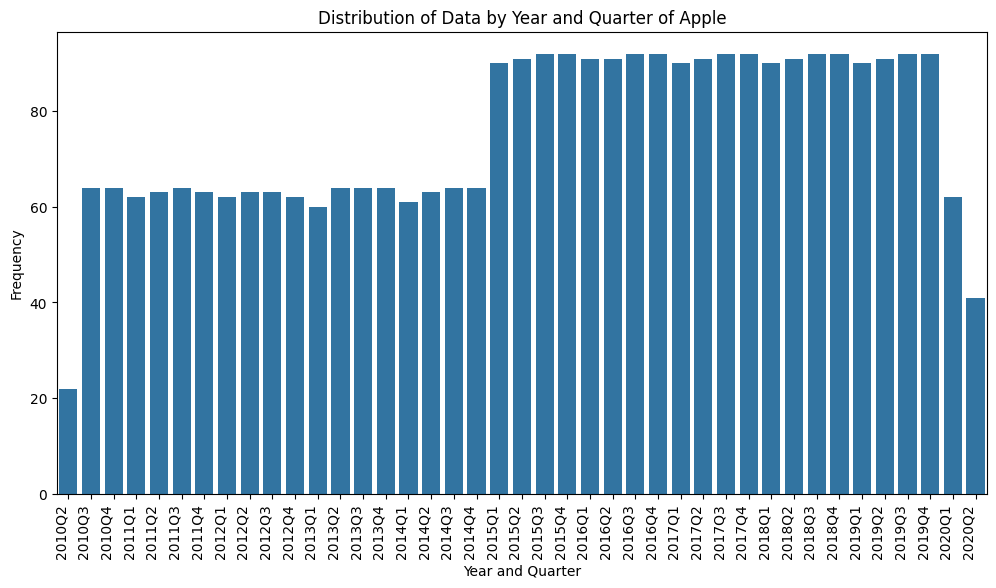

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_quarter', data=aapl_df, order=sorted(df['year_quarter'].unique()))
plt.title('Distribution of Data by Year and Quarter of Apple')
plt.xlabel('Year and Quarter')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.show()

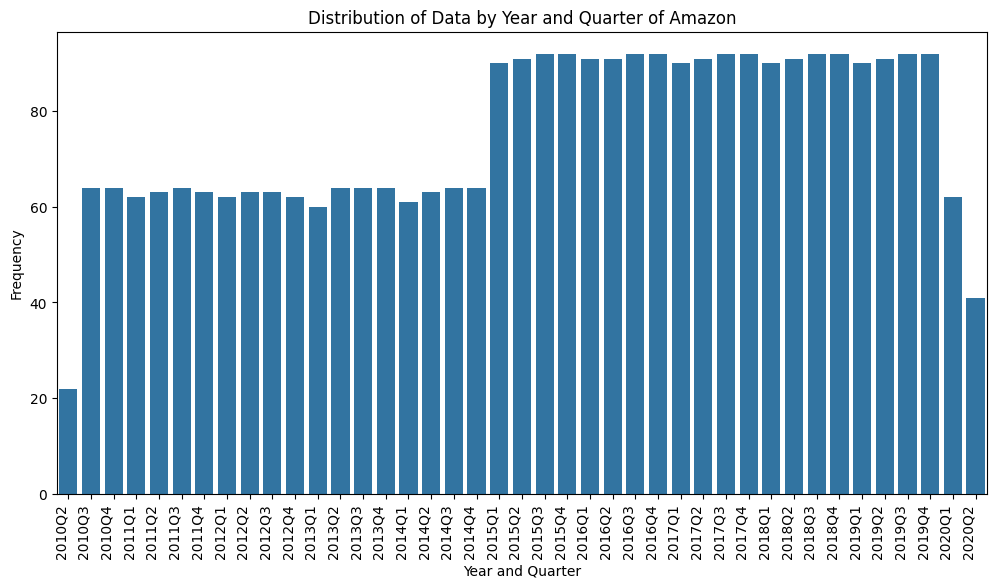

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_quarter', data=amzn_df, order=sorted(df['year_quarter'].unique()))
plt.title('Distribution of Data by Year and Quarter of Amazon')
plt.xlabel('Year and Quarter')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.show()

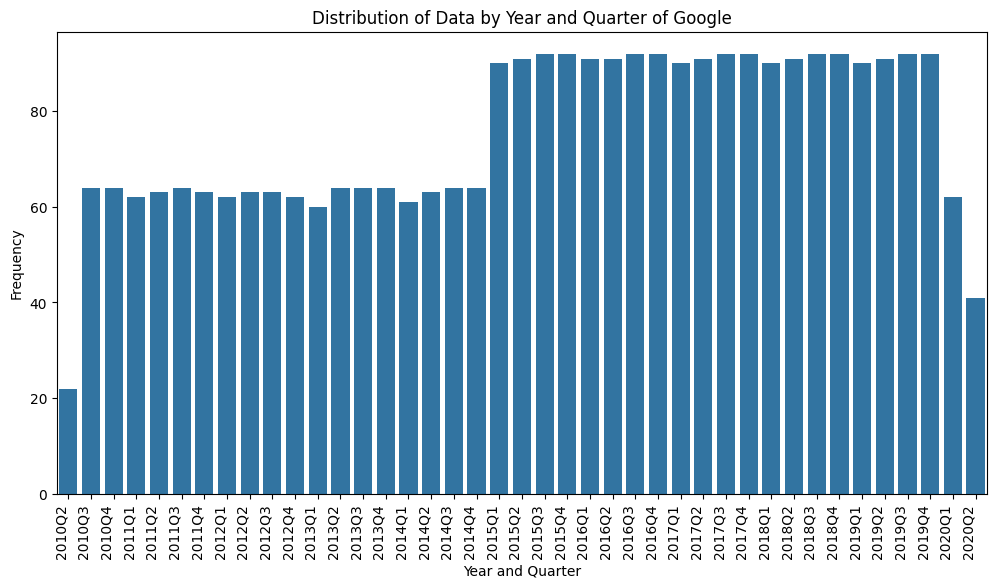

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_quarter', data=gg_df, order=sorted(df['year_quarter'].unique()))
plt.title('Distribution of Data by Year and Quarter of Google')
plt.xlabel('Year and Quarter')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.show()

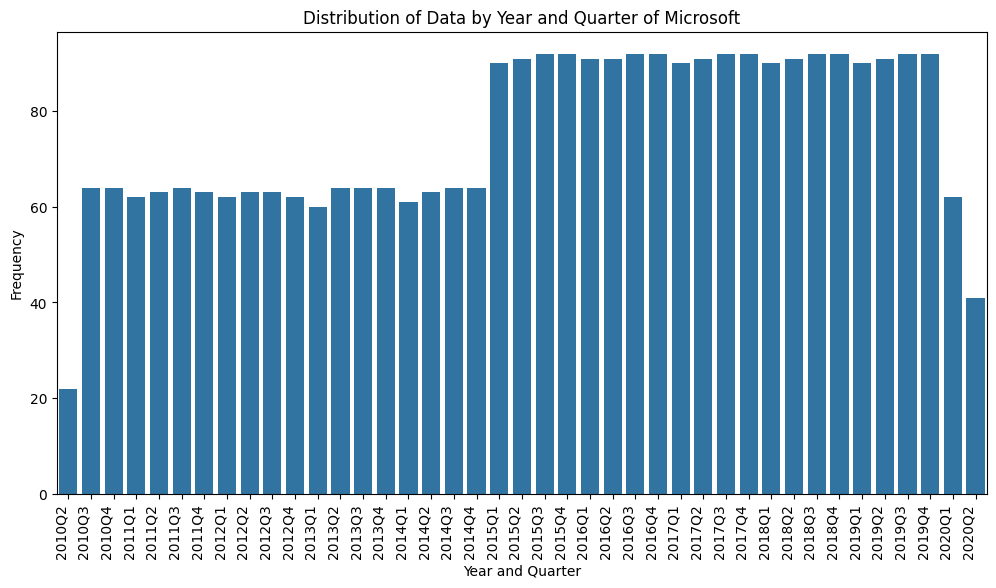

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_quarter', data=msft_df, order=sorted(df['year_quarter'].unique()))
plt.title('Distribution of Data by Year and Quarter of Microsoft')
plt.xlabel('Year and Quarter')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.show()

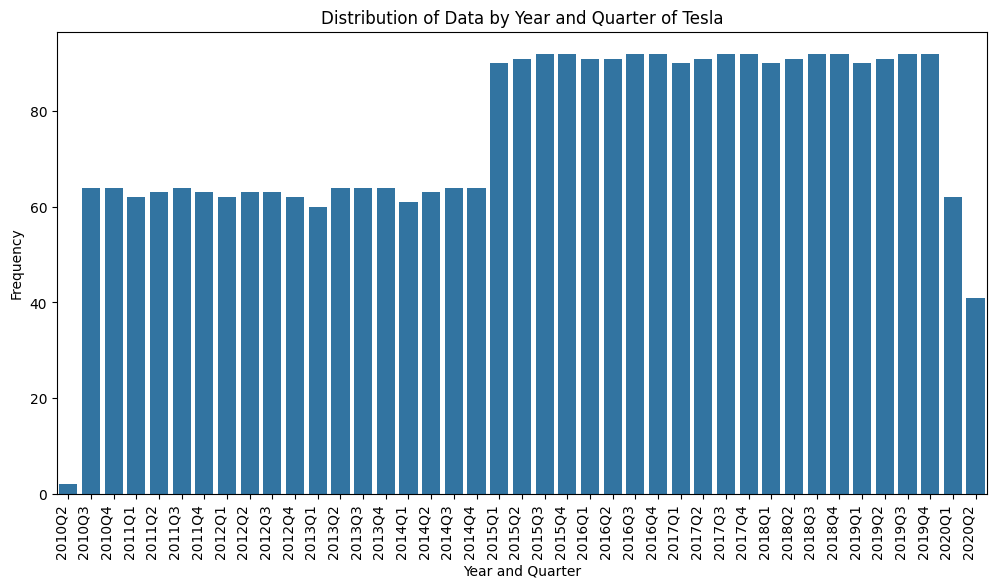

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_quarter', data=tsla_df, order=sorted(df['year_quarter'].unique()))
plt.title('Distribution of Data by Year and Quarter of Tesla')
plt.xlabel('Year and Quarter')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.show()

In [ ]:
import pandas as pd

def split_data(df):
    """Splits a DataFrame into training and testing sets based on the 'year_quarter' column.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        tuple: (df_train, df_test) - DataFrames for training and testing.
    """
    # Chuyển 'year_quarter' từ period thành timestamp (đầu quý)
    df = df.copy()
    df['year_quarter'] = df['year_quarter'].dt.to_timestamp()

    # Định nghĩa khoảng thời gian của tập test
    test_start_date = pd.Timestamp('2019-01-01')
    test_end_date = pd.Timestamp('2020-06-30')

    # Chia dữ liệu train/test
    df_train = df[df['year_quarter'] < test_start_date]
    df_test = df[(df['year_quarter'] >= test_start_date) & (df['year_quarter'] <= test_end_date)]

    return df_train, df_test

# Chia dữ liệu cho từng công ty
aapl_train, aapl_test = split_data(aapl_df)
amzn_train, amzn_test = split_data(amzn_df)
gg_train, gg_test = split_data(gg_df)
msft_train, msft_test = split_data(msft_df)
tsla_train, tsla_test = split_data(tsla_df)

# Kiểm tra số lượng dòng mỗi tập
print(f"AAPL: train={len(aapl_train)}, test={len(aapl_test)}")
print(f"AMZN: train={len(amzn_train)}, test={len(amzn_test)}")
print(f"GG: train={len(gg_train)}, test={len(gg_test)}")
print(f"MSFT: train={len(msft_train)}, test={len(msft_test)}")
print(f"TSLA: train={len(tsla_train)}, test={len(tsla_test)}")

AAPL: train=2617, test=468
AMZN: train=2617, test=468
GG: train=2617, test=468
MSFT: train=2617, test=468
TSLA: train=2597, test=468


#### feature selection (filter: correlation)

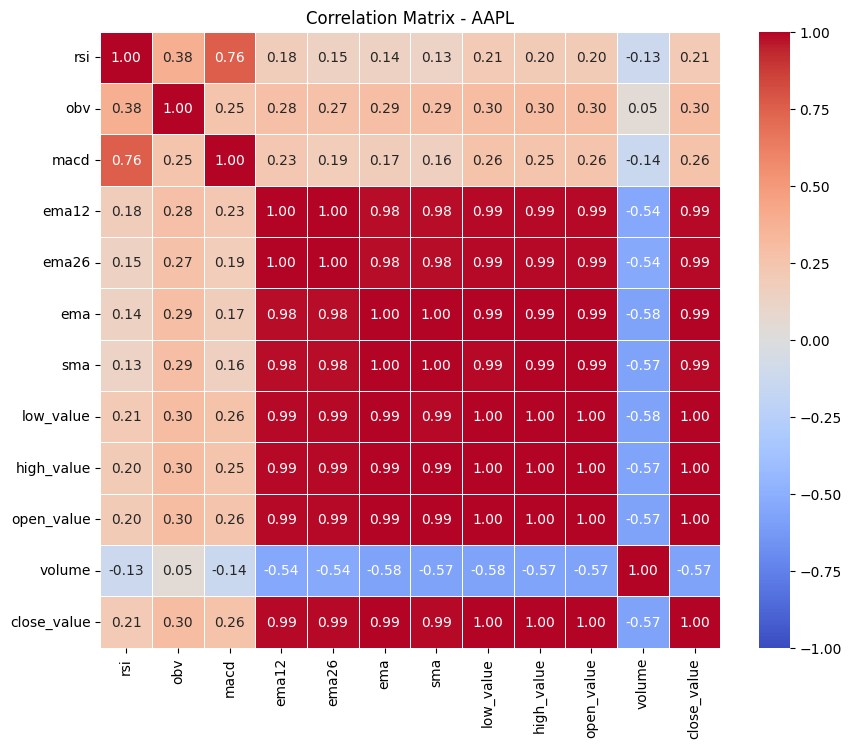

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(df, title):
    """Plots a full correlation matrix of selected features including 'close_value'."""
    features = ['rsi', 'obv', 'macd', 'ema12', 'ema26', 'ema', 'sma',
                'low_value', 'high_value', 'open_value', 'volume', 'close_value']

    # Tính ma trận tương quan
    correlation_matrix = df[features].corr()

    # Vẽ heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - {title}')
    plt.show()

# Vẽ biểu đồ tương quan cho từng công ty
plot_correlation_matrix(aapl_df, 'AAPL')


- các feature có tương quan cao với target là: `ema12`, `ema26`, `ema`, `sma`, `low_value`, `high_value`, `open_value`

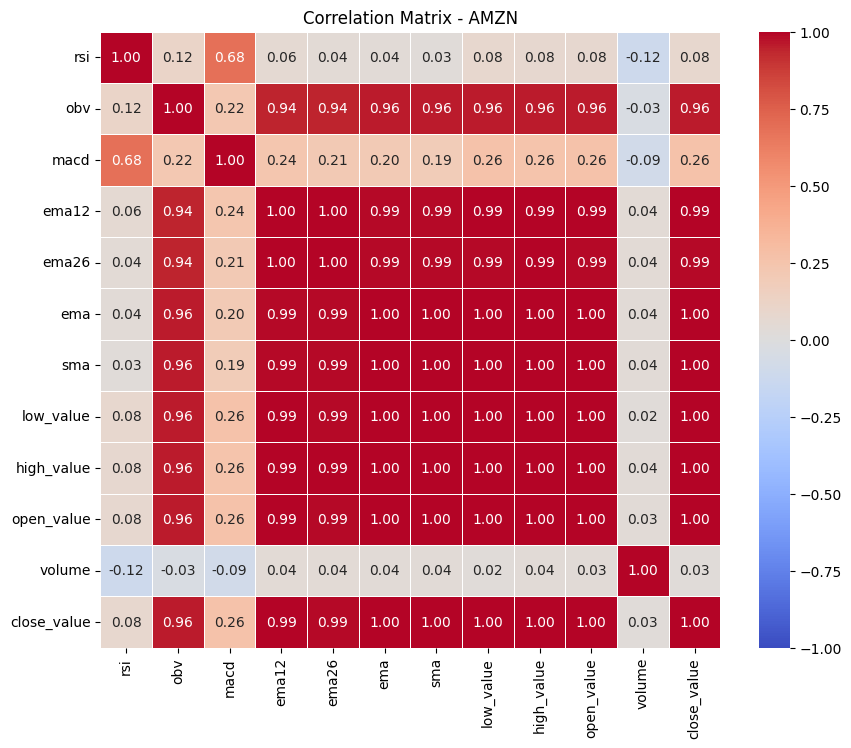

In [ ]:
plot_correlation_matrix(amzn_df, 'AMZN')

- các feature có tương quan cao với target là: `ema12`, `ema26`, `ema`, `sma`, `low_value`, `high_value`, `open_value`, `obv`

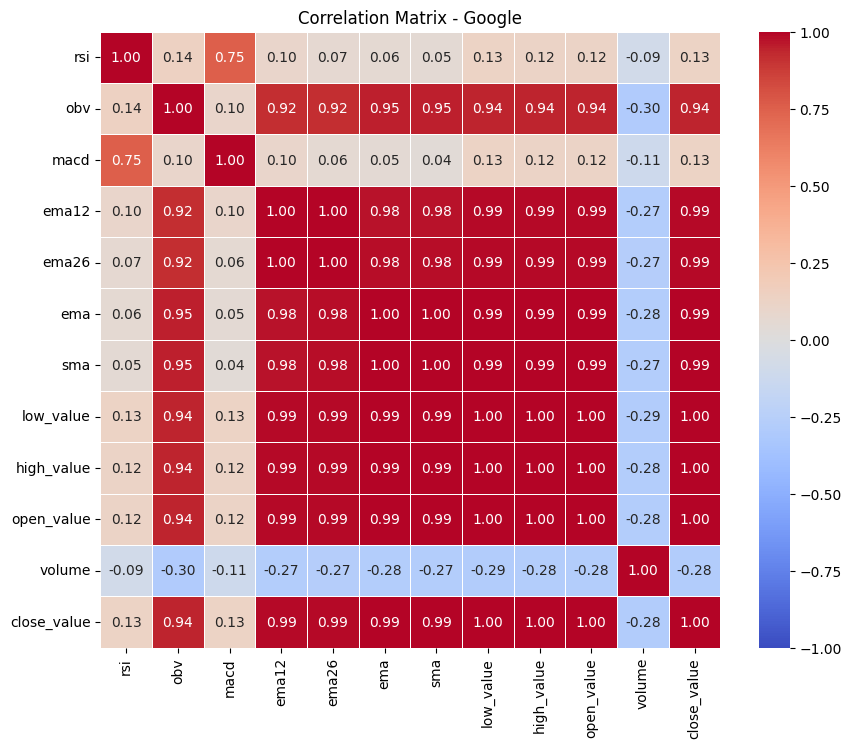

In [ ]:
plot_correlation_matrix(gg_df, 'Google')

- các feature có tương quan cao với target là: `ema12`, `ema26`, `ema`, `sma`, `low_value`, `high_value`, `open_value`, `obv`

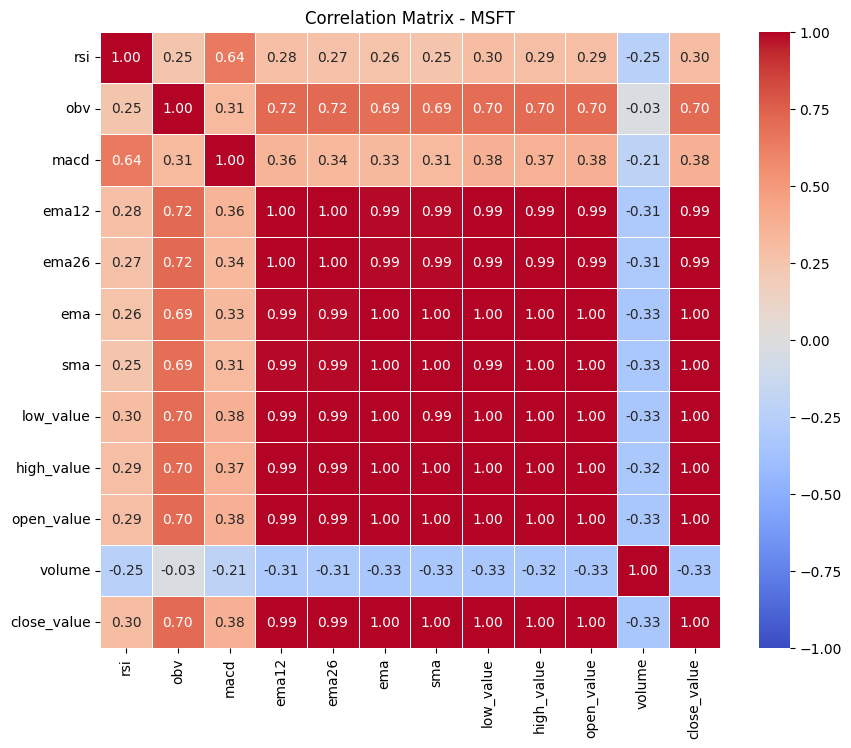

In [ ]:
plot_correlation_matrix(msft_df, 'MSFT')

- các feature có tương quan cao với target là: `ema12`, `ema26`, `ema`, `sma`, `low_value`, `high_value`, `open_value`, `obv`

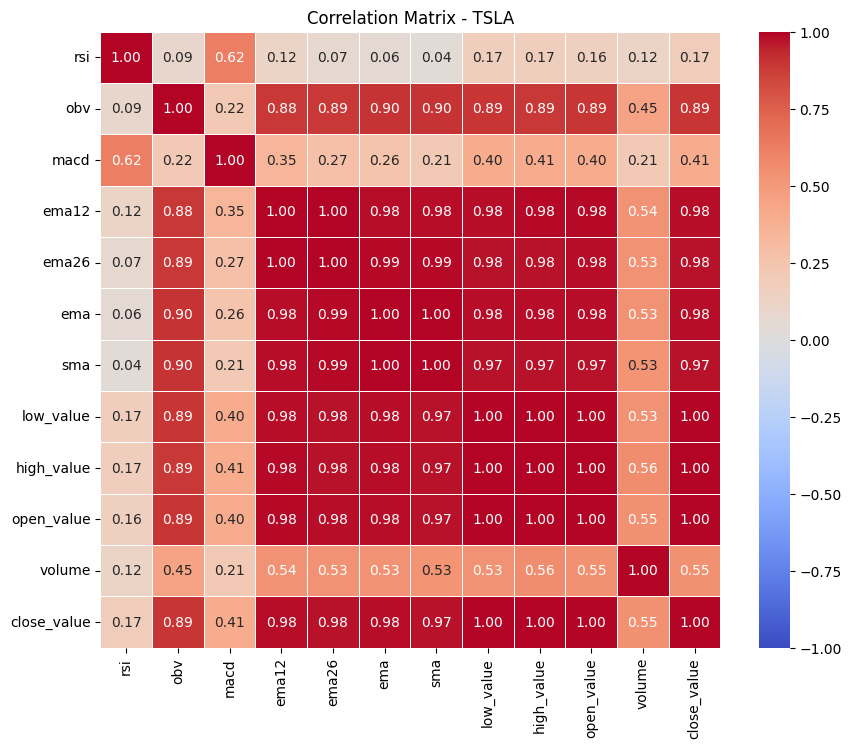

In [ ]:
plot_correlation_matrix(tsla_df, 'TSLA')

- các feature có tương quan cao với target là: `ema12`, `ema26`, `ema`, `sma`, `low_value`, `high_value`, `open_value`, `obv`
- giữ lại các feature là `obv`, `sma`, `low_value`, `high_value` và `open_value`

In [ ]:
import pandas as pd

# Kiểm tra các biến có tồn tại không
try:
    train_dfs = [aapl_train, amzn_train, gg_train, msft_train, tsla_train]
except NameError as e:
    print(f"Lỗi: {e}")
    train_dfs = []  # Gán danh sách rỗng để tránh lỗi

# Chỉ gộp nếu danh sách không rỗng
if train_dfs:
    df_train_combined = pd.concat(train_dfs, ignore_index=True)

    # Chọn các cột cần thiết
    selected_columns = ['obv', 'sma', 'low_value', 'high_value', 'open_value', 'close_value']

    # Kiểm tra xem các cột có tồn tại trong tập dữ liệu không
    missing_columns = [col for col in selected_columns if col not in df_train_combined.columns]
    if missing_columns:
        print(f"Cảnh báo: Các cột sau không có trong dữ liệu: {missing_columns}")
    else:
        df_train_final = df_train_combined[selected_columns]
        print(df_train_final.head())
else:
    print("Không có DataFrame nào để gộp!")

        obv  sma  low_value  high_value  open_value  close_value
0  0.291374  0.0   0.011539    0.011367    0.010638     0.010193
1  0.322351  0.0   0.012217    0.010812    0.013021     0.011714
2  0.293044  0.0   0.012254    0.011177    0.013336     0.011310
3  0.258917  0.0   0.009404    0.009399    0.009911     0.007820
4  0.218975  0.0   0.007392    0.008059    0.009950     0.005370


In [ ]:
df_train_combined

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,year,month,day,quarter,year_quarter,sma,ema,ema12,ema26,macd,obv,rsi
0,AAPL,2010-06-01,0.010193,0.459106,0.010638,0.011367,0.011539,2010,6,1,2,2010-04-01,0.000000,0.000000,0.322526,0.324485,0.655890,0.291374,0.467966
1,AAPL,2010-06-02,0.011714,0.355218,0.013021,0.010812,0.012217,2010,6,2,2,2010-04-01,0.000000,0.000000,0.322526,0.324485,0.655890,0.322351,0.467966
2,AAPL,2010-06-03,0.011310,0.334707,0.013336,0.011177,0.012254,2010,6,3,2,2010-04-01,0.000000,0.000000,0.322526,0.324485,0.655890,0.293044,0.467966
3,AAPL,2010-06-04,0.007820,0.393907,0.009911,0.009399,0.009404,2010,6,4,2,2010-04-01,0.000000,0.000000,0.322526,0.324485,0.655890,0.258917,0.467966
4,AAPL,2010-06-07,0.005370,0.465308,0.009950,0.008059,0.007392,2010,6,7,2,2010-04-01,0.000000,0.000000,0.322526,0.324485,0.655890,0.218975,0.467966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13060,TSLA,2018-12-27,0.333100,0.138917,0.334707,0.320826,0.323371,2018,12,27,4,2018-10-01,0.440803,0.435387,0.380374,0.414225,0.397728,0.477614,0.333503
13061,TSLA,2018-12-28,0.352776,0.161136,0.338300,0.335598,0.342456,2018,12,28,4,2018-10-01,0.440207,0.435241,0.382315,0.414162,0.406917,0.492426,0.402463
13062,TSLA,2018-12-29,0.352776,0.161136,0.338300,0.335598,0.342456,2018,12,29,4,2018-10-01,0.439896,0.435104,0.383958,0.414104,0.414714,0.492426,0.402463
13063,TSLA,2018-12-30,0.352776,0.161136,0.338300,0.335598,0.342456,2018,12,30,4,2018-10-01,0.439189,0.434976,0.385347,0.414050,0.421332,0.492426,0.402463


In [ ]:
# Kiểm tra các biến có tồn tại không
try:
    test_dfs = [aapl_test, amzn_test, gg_test, msft_test, tsla_test]
except NameError as e:
    print(f"Lỗi: {e}")
    test_dfs = []  # Gán danh sách rỗng để tránh lỗi

# Chỉ gộp nếu danh sách không rỗng
if test_dfs:
    df_test_combined = pd.concat(test_dfs, ignore_index=True)

    # Chọn các cột cần thiết
    selected_columns = ['obv', 'sma', 'low_value', 'high_value', 'open_value', 'close_value']

    # Kiểm tra xem các cột có tồn tại trong tập dữ liệu không
    missing_columns = [col for col in selected_columns if col not in df_train_combined.columns]
    if missing_columns:
        print(f"Cảnh báo: Các cột sau không có trong dữ liệu: {missing_columns}")
    else:
        df_test_final = df_test_combined[selected_columns]
        print(df_test_final.head())
else:
    print("Không có DataFrame nào để gộp!")

        obv       sma  low_value  high_value  open_value  close_value
0  0.383330  0.511999   0.423988    0.425324    0.428310     0.421489
1  0.389763  0.509179   0.416221    0.423585    0.415790     0.422103
2  0.373316  0.505563   0.374005    0.378802    0.378264     0.368403
3  0.383682  0.502582   0.380218    0.388454    0.380156     0.389125
4  0.383682  0.499809   0.380218    0.388454    0.380156     0.389125


In [ ]:
df_train_final

,obv,sma,low_value,high_value,open_value,close_value
0,0.291374,0.000000,0.011539,0.011367,0.010638,0.010193
1,0.322351,0.000000,0.012217,0.010812,0.013021,0.011714
2,0.293044,0.000000,0.012254,0.011177,0.013336,0.011310
3,0.258917,0.000000,0.009404,0.009399,0.009911,0.007820
4,0.218975,0.000000,0.007392,0.008059,0.009950,0.005370
...,...,...,...,...,...,...
13060,0.477614,0.440803,0.323371,0.320826,0.334707,0.333100
13061,0.492426,0.440207,0.342456,0.335598,0.338300,0.352776
13062,0.492426,0.439896,0.342456,0.335598,0.338300,0.352776
13063,0.492426,0.439189,0.342456,0.335598,0.338300,0.352776


### model training

#### PyTorch data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Định nghĩa các cột đặc trưng và mục tiêu
features = ['obv', 'sma', 'low_value', 'high_value', 'open_value']
target_col = 'close_value'

# Kiểm tra các cột có tồn tại trong DataFrame không
expected_columns = features + [target_col]
if not set(expected_columns).issubset(df_train_final.columns):
    missing_cols = set(expected_columns) - set(df_train_final.columns)
    raise ValueError(f"Các cột thiếu trong df_train_final: {missing_cols}")
if not set(expected_columns).issubset(df_test_final.columns):
    missing_cols = set(expected_columns) - set(df_test_final.columns)
    raise ValueError(f"Các cột thiếu trong df_test_final: {missing_cols}")

# Extract features và target
X_train = df_train_final[features].values
y_train = df_train_final[target_col].values
X_test = df_test_final[features].values
y_test = df_test_final[target_col].values

# Chuyển thành tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Shape: [N, 5]
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)  # Shape: [N, 1]
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Shape: [M, 5]
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)  # Shape: [M, 1]

# Reshape cho LSTM (thêm chiều sequence_length=1)
X_train_tensor_lstm = X_train_tensor.unsqueeze(1)  # Shape: [N, 1, 5]
X_test_tensor_lstm = X_test_tensor.unsqueeze(1)    # Shape: [M, 1, 5]

# Kiểm tra shape
print(f"X_train_tensor (Linear Regression): {X_train_tensor.shape}")
print(f"y_train_tensor: {y_train_tensor.shape}")
print(f"X_test_tensor (Linear Regression): {X_test_tensor.shape}")
print(f"y_test_tensor: {y_test_tensor.shape}")
print(f"X_train_tensor_lstm (LSTM): {X_train_tensor_lstm.shape}")
print(f"X_test_tensor_lstm (LSTM): {X_test_tensor_lstm.shape}")

# Tạo DataLoader cho Linear Regression
train_dataset_linear = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset_linear = TensorDataset(X_test_tensor, y_test_tensor)
train_loader_linear = DataLoader(train_dataset_linear, batch_size=32, shuffle=True)
test_loader_linear = DataLoader(test_dataset_linear, batch_size=32, shuffle=False)

# Tạo DataLoader cho LSTM
train_dataset_lstm = TensorDataset(X_train_tensor_lstm, y_train_tensor)
test_dataset_lstm = TensorDataset(X_test_tensor_lstm, y_test_tensor)
train_loader_lstm = DataLoader(train_dataset_lstm, batch_size=32, shuffle=True)
test_loader_lstm = DataLoader(test_dataset_lstm, batch_size=32, shuffle=False)

X_train_tensor (Linear Regression): torch.Size([13065, 5])
y_train_tensor: torch.Size([13065, 1])
X_test_tensor (Linear Regression): torch.Size([2340, 5])
y_test_tensor: torch.Size([2340, 1])
X_train_tensor_lstm (LSTM): torch.Size([13065, 1, 5])
X_test_tensor_lstm (LSTM): torch.Size([2340, 1, 5])


#### linear regression

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

#### LSTM

- mạng LSTM với cấu hình như trong repo
  - 2 hidden layer
  - 60 neuron/layer

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

#### train model

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    model.eval()
    print('Finished Training')

#### evaluate model

In [ ]:
def evaluate_model(model, test_loader, device, model_name):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            y_true.extend(targets.cpu().numpy())
            y_pred.extend(outputs.cpu().numpy())

    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    r2 = r2_score(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    print(f"Kết quả của {model_name}")
    print(f"R-squared: {r2:.4f}")
    print(f"Explained Variance: {explained_var:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    return y_true, y_pred

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [ ]:
# So sánh hai mô hình
def compare_models(linear_metrics, lstm_metrics):
    metrics_df = pd.DataFrame({
        'Metric': ['R-squared', 'Explained Variance', 'MAE', 'RMSE', 'MAPE (%)'],
        'Linear Regression': [
            linear_metrics['R-squared'],
            linear_metrics['Explained Variance'],
            linear_metrics['MAE'],
            linear_metrics['RMSE'],
            linear_metrics['MAPE']
        ],
        'LSTM': [
            lstm_metrics['R-squared'],
            lstm_metrics['Explained Variance'],
            lstm_metrics['MAE'],
            lstm_metrics['RMSE'],
            lstm_metrics['MAPE']
        ]
    })
    metrics_df = metrics_df.round(4)
    print("\nSo sánh hiệu suất giữa Linear Regression và LSTM:")
    print(metrics_df.to_string(index=False))

In [ ]:
def plot_predictions(dates, y_true, y_pred_linear, y_pred_lstm, model_names=['Linear Regression', 'LSTM']):
    plt.figure(figsize=(12, 6))

    # Vẽ cho Linear Regression
    plt.plot(dates, y_true, label='Close', color='green', linestyle='--')
    plt.plot(dates, y_pred_linear, label=f'Predicted ({model_names[0]})', color='blue')

    # Tạo figure mới cho LSTM
    plt.figure(figsize=(12, 6))
    plt.plot(dates, y_true, label='Close', color='green', linestyle='--')
    plt.plot(dates, y_pred_lstm, label=f'Predicted ({model_names[1]})', color='blue')

    # Cài đặt chung
    for ax in plt.gcf().axes:
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_title(f'Prediction of the {model_names[0]} Model' if ax == plt.gcf().axes[0] else f'Prediction of the {model_names[1]} Model')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)

    plt.tight_layout()
    plt.show()

#### training and validation

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Linear Regression
print("\nTraining Linear Regression...")
input_dim = X_train_tensor.shape[1]  # 5
linear_model = LinearRegressionModel(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001)
train_model(linear_model, train_loader_linear, criterion, optimizer, num_epochs=100, device=device)
y_true_linear, y_pred_linear = evaluate_model(linear_model, test_loader_linear, device, "Linear Regression")


Training Linear Regression...
Epoch [10/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000
Finished Training
Kết quả của Linear Regression
R-squared: 0.9983
Explained Variance: 0.9984
Mean Absolute Error (MAE): 0.0053
Root Mean Squared Error (RMSE): 0.0080
Mean Absolute Percentage Error (MAPE): 0.88%


In [ ]:
print("\nTraining LSTM...")
input_dim = X_train_tensor_lstm.shape[2]  # 5
lstm_model = LSTMModel(input_dim, hidden_dim=60, num_layers=2).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
train_model(lstm_model, train_loader_lstm, criterion, optimizer, num_epochs=100, device=device)
y_true_lstm, y_pred_lstm = evaluate_model(lstm_model, test_loader_lstm, device, "LSTM")


Training LSTM...
Epoch [10/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000
Finished Training
Kết quả của LSTM
R-squared: 0.9982
Explained Variance: 0.9982
Mean Absolute Error (MAE): 0.0062
Root Mean Squared Error (RMSE): 0.0084
Mean Absolute Percentage Error (MAPE): 1.03%


In [ ]:
linear_metrics = {'R-squared': r2_score(y_true_linear, y_pred_linear),
                  'Explained Variance': explained_variance_score(y_true_linear, y_pred_linear),
                  'MAE': mean_absolute_error(y_true_linear, y_pred_linear),
                  'RMSE': np.sqrt(mean_squared_error(y_true_linear, y_pred_linear)),
                  'MAPE': mean_absolute_percentage_error(y_true_linear, y_pred_linear) * 100}
lstm_metrics = {'R-squared': r2_score(y_true_lstm, y_pred_lstm),
                'Explained Variance': explained_variance_score(y_true_lstm, y_pred_lstm),
                'MAE': mean_absolute_error(y_true_lstm, y_pred_lstm),
                'RMSE': np.sqrt(mean_squared_error(y_true_lstm, y_pred_lstm)),
                'MAPE': mean_absolute_percentage_error(y_true_lstm, y_pred_lstm) * 100}
compare_models(linear_metrics, lstm_metrics)


So sánh hiệu suất giữa Linear Regression và LSTM:
            Metric  Linear Regression   LSTM
         R-squared             0.9983 0.9982
Explained Variance             0.9984 0.9982
               MAE             0.0053 0.0062
              RMSE             0.0080 0.0084
          MAPE (%)             0.8779 1.0260


#### prediction

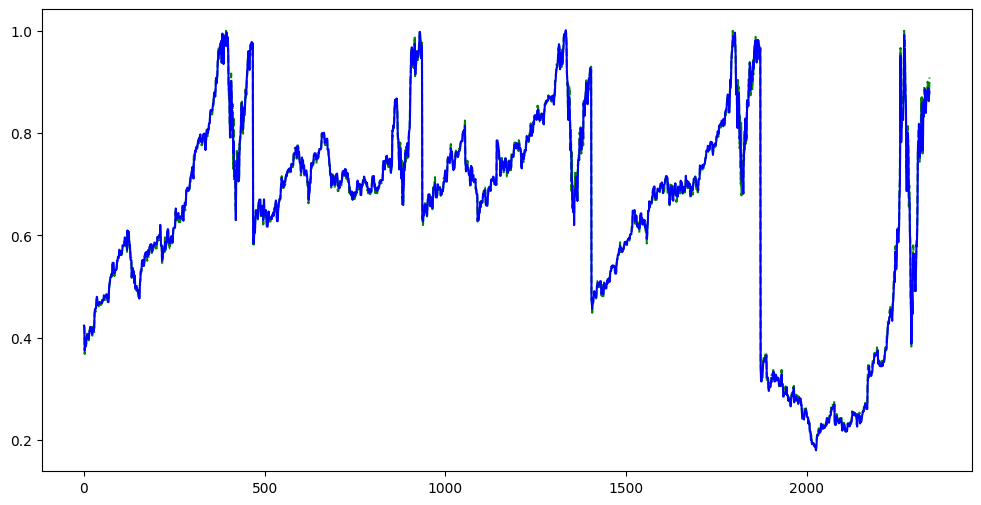

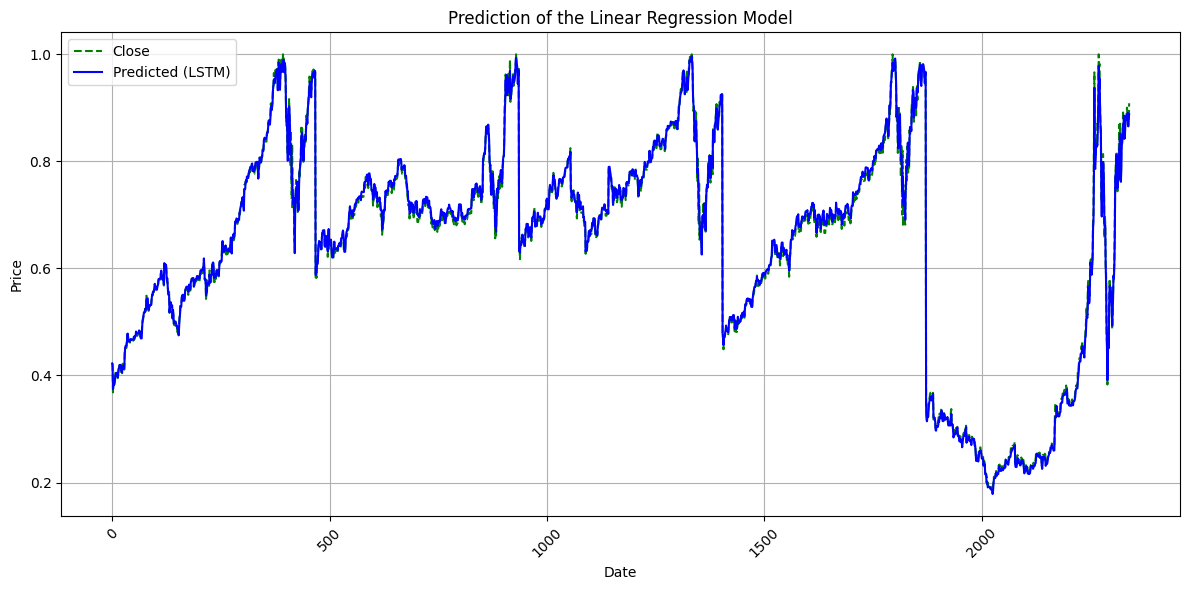

In [ ]:
dates = df_test_final.index  # Lấy index thời gian từ df_test_final
plot_predictions(dates, y_true_linear, y_pred_linear, y_pred_lstm)